In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression


In [2]:
#  Import and read the charity_data.csv.
batter_woba_df = pd.read_csv("Resources/off_output_for_learning(copy).csv")
batter_woba_df.head()

,IDfg,Name,Age,G,AB,PA,H,1B,2B,3B,...,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,avg_wOBA,wOBA_2023,zscore_difference
0,1744,Miguel Cabrera,37.666667,126.000000,454.000000,502.666667,120.333333,94.000000,15.666667,0.000000,...,351.333333,0.152667,0.268000,0.246000,0.395667,0.307000,-0.766667,0.299333,0.293,0.055586
1,2136,David Peralta,32.666667,127.666667,436.000000,483.666667,113.666667,68.666667,29.666667,4.666667,...,341.333333,0.157000,0.266333,0.246000,0.374333,0.303333,1.266667,0.322333,0.311,-0.189938
2,2396,Carlos Santana,34.666667,149.000000,523.000000,617.000000,123.000000,77.666667,21.000000,0.333333,...,426.666667,0.166333,0.249000,0.254333,0.446333,0.351333,1.766667,0.327333,0.307,-0.449445
3,2434,Nelson Cruz,39.666667,128.000000,471.666667,537.333333,127.333333,78.333333,21.000000,0.333333,...,354.000000,0.127333,0.271667,0.265000,0.516000,0.366000,1.800000,0.351667,0.291,-1.622077
4,2967,Tommy Pham,32.666667,148.000000,532.000000,612.333333,131.666667,85.666667,26.666667,1.666667,...,396.000000,0.204333,0.289000,0.253667,0.425333,0.338333,1.733333,0.323667,0.343,0.602240


In [3]:
# Drop the 'Name', IDfg, 'wOBA_2023' so it is not part of the classifacation.
batter_woba_class = batter_woba_df.copy()
batter_woba_class.drop(['Name', 'IDfg', 'wOBA_2023'], axis=1, inplace=True)
batter_woba_class.dropna(axis=1, inplace=True)
batter_woba_class_encoded = batter_woba_class.copy()
batter_woba_class_encoded['zscore_difference'] = batter_woba_class_encoded['zscore_difference'].apply(lambda x: 1 if x > 0 else 0)
batter_woba_class_encoded.head()

,Age,G,AB,PA,H,1B,2B,3B,HR,R,...,HardHit%,Events,CStr%,CSW%,xBA,xSLG,xwOBA,L-WAR,avg_wOBA,zscore_difference
0,37.666667,126.000000,454.000000,502.666667,120.333333,94.000000,15.666667,0.000000,10.666667,38.0,...,0.438667,351.333333,0.152667,0.268000,0.246000,0.395667,0.307000,-0.766667,0.299333,1
1,32.666667,127.666667,436.000000,483.666667,113.666667,68.666667,29.666667,4.666667,10.666667,48.0,...,0.422000,341.333333,0.157000,0.266333,0.246000,0.374333,0.303333,1.266667,0.322333,0
2,34.666667,149.000000,523.000000,617.000000,123.000000,77.666667,21.000000,0.333333,24.000000,76.0,...,0.438667,426.666667,0.166333,0.249000,0.254333,0.446333,0.351333,1.766667,0.327333,0
3,39.666667,128.000000,471.666667,537.333333,127.333333,78.333333,21.000000,0.333333,27.666667,70.0,...,0.497000,354.000000,0.127333,0.271667,0.265000,0.516000,0.366000,1.800000,0.351667,0
4,32.666667,148.000000,532.000000,612.333333,131.666667,85.666667,26.666667,1.666667,17.666667,80.0,...,0.466000,396.000000,0.204333,0.289000,0.253667,0.425333,0.338333,1.733333,0.323667,1


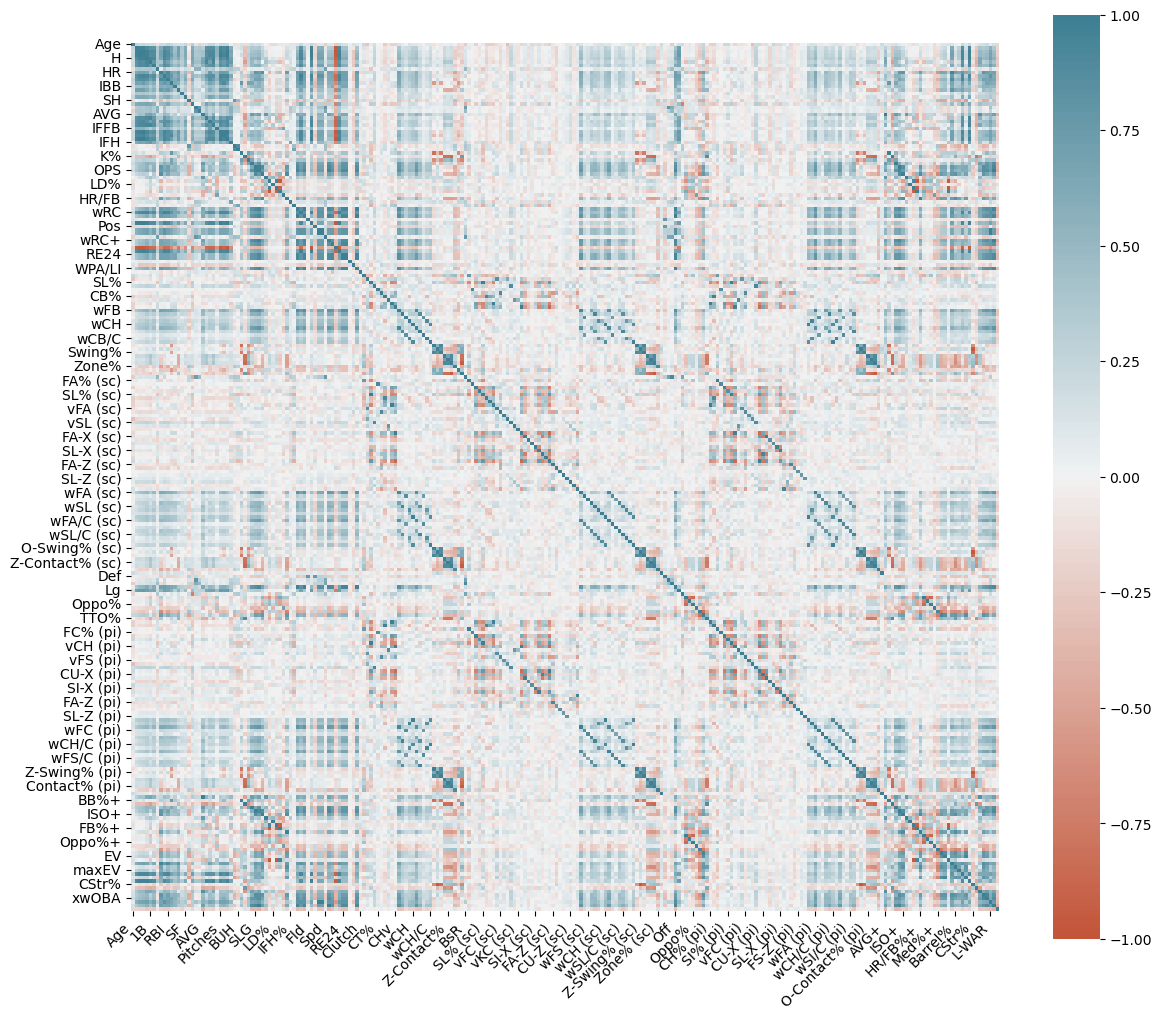

In [4]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

data = batter_woba_class_encoded 

corr = data.corr()

# Create a larger plot
plt.figure(figsize=(14, 12))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    );
# Save the plot as an image
plt.savefig("Images/too_many_features.png", bbox_inches="tight")

plt.show()

In [5]:
columns_to_keep_class = ['Age', 'PA', 'H', 'HR', 'R', 'RBI', 'BB', 'SO', 'SB', 'WAR', 'AVG', 'BB%', 'K%',
                  'BB/K', 'OPS', 'BABIP', 'Spd', 'wRC+', 'O-Swing%', 'Z-Swing%', 'Swing%', 'Z-Contact%', 'Soft%+',
                  'Med%+', 'Hard%+', 'AVG+', 'OBP+', 'SLG+', 'HardHit%', 'xBA', 'L-WAR', 'avg_wOBA', 'zscore_difference']

batter_woba_class_encoded = batter_woba_class_encoded[columns_to_keep_class]

In [6]:
# data = batter_woba_class_encoded 

# corr = data.corr()

# # Create a larger plot
# plt.figure(figsize=(14, 12))

# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
#     );
# # Save the plot as an image
# plt.savefig("Images/less_features.png", bbox_inches="tight")

# plt.show()

In [7]:
# columns_to_keep_class = ['Age', 'SO', 'SB', 'WAR', 'BB%', 'K%',
#                 'OPS', 'BABIP', 'wRC+', 'Hard%+', 'AVG+', 'OBP+', 'SLG+', 'HardHit%', 'avg_wOBA', 'zscore_difference']

# columns_to_keep_class = ['wRC+', 'zscore_difference']
# batter_woba_class_encoded = batter_woba_class_encoded[columns_to_keep_class]

In [8]:
# data = batter_woba_class_encoded 

# corr = data.corr()

# # Create a larger plot
# plt.figure(figsize=(14, 12))

# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
#     );
# # Save the plot as an image
# plt.savefig("Images/even_less_features.png", bbox_inches="tight")

# plt.show()

In [9]:
# Split our preprocessed data into our features and target arrays
X = batter_woba_class_encoded.drop('zscore_difference', axis=1)  # Features (remove the target column)
y = batter_woba_class_encoded['zscore_difference']              # Target

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (243, 32)
X_test shape: (61, 32)
y_train shape: (243,)
y_test shape: (61,)


In [10]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler on the training data
X_scaler = scaler.fit(X_train)

# Scale the training and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print("Selected X_train shape:", X_train_scaled.shape)
print("Selected X_test shape:", X_test_scaled.shape)
print("Selected y_train shape:", y_train.shape)

Selected X_train shape: (243, 32)
Selected X_test shape: (61, 32)
Selected y_train shape: (243,)


In [11]:
# Instantiate the random oversampler model
oversampler = RandomOverSampler(random_state=1)

# Fit the scaled training data to the random oversampler model
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

In [12]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model for reproducibility
logistic_model = LogisticRegression(random_state=1, max_iter=100, C=0.1)

# Fit the model using the training data
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.1, random_state=1)

In [13]:
# Make a prediction using the testing data
y_pred = logistic_model.predict(X_test_scaled)

In [14]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
# Print the balanced_accuracy score of the model
balanced_acc_score = balanced_accuracy_score(y_test, y_pred)

# Print the balanced accuracy score
print("Balanced Accuracy Score:", balanced_acc_score)

Balanced Accuracy Score: 0.6564516129032258


In [15]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

boost_model = xgb.XGBClassifier(
    max_depth=3,
    learning_rate=0.01,  # Update to the best learning_rate
    n_estimators=500,
    subsample=0.5,       # Add subsample parameter with best value
    colsample_bytree=0.25,  # Add colsample_bytree parameter with best value
    objective='binary:logistic',
    random_state=42
)


boost_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.25, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [16]:
y_pred = boost_model.predict(X_test_scaled)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [18]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Create the Balanced Random Forest model
balanced_rf_model = BalancedRandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Fit the model
balanced_rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_balanced_rf = balanced_rf_model.predict(X_test_scaled)
balanced_rf_accuracy = accuracy_score(y_test, y_pred_balanced_rf)
print(f"Balanced Random Forest Accuracy: {balanced_rf_accuracy:.2f}")

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/p

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/p

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/p

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/p

Balanced Random Forest Accuracy: 0.72


In [19]:
# Create a DataFrame to combine column names and feature importances
# Get the feature importances
feature_importances = boost_model.feature_importances_

# Create a DataFrame to combine column names and feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
feature_importance_df

,Feature,Importance
17,wRC+,0.051169
25,AVG+,0.050526
27,SLG+,0.047182
14,OPS,0.043094
31,avg_wOBA,0.041104
26,OBP+,0.039818
10,AVG,0.037782
28,HardHit%,0.034698
9,WAR,0.034544
11,BB%,0.032663


In [20]:
import shap

explainer = shap.Explainer(boost_model, X_train_resampled)

shap_values = explainer(X_test_scaled, check_additivity=False)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


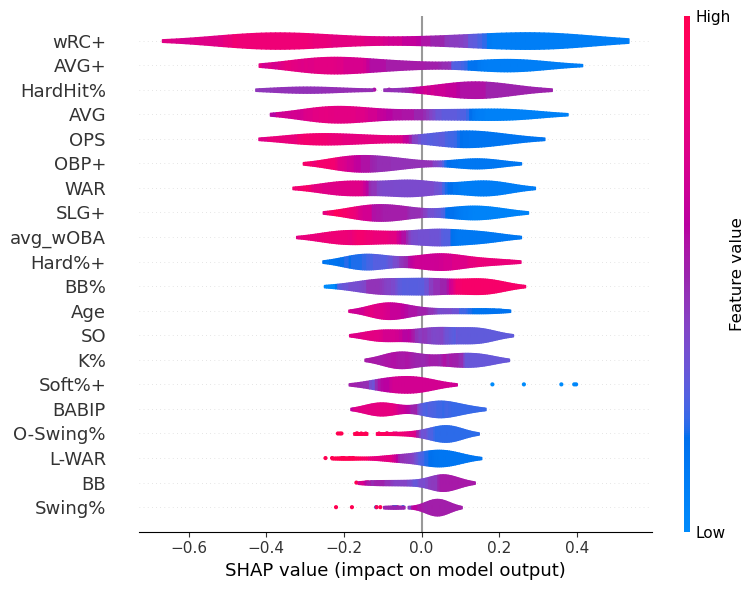

In [21]:
# Create a smaller plot
plt.figure(figsize=(8, 6))

# Generate SHAP summary plot with adjusted figsize
shap.summary_plot(shap_values, X_test_scaled, plot_type='violin', feature_names=X_train.columns, show=False)

# Get the current axes and adjust their size
ax = plt.gca()
ax.figure.set_size_inches(8, 6)
plt.savefig('Images/shap_woba_class.png', bbox_inches='tight')
# Show the plot
plt.tight_layout()
plt.show()
